In [1]:
library("plotgardener")
library("org.Hs.eg.db")
library("TxDb.Hsapiens.UCSC.hg19.knownGene")
library("rtracklayer")
library("iterators")
library(ArchR)

ERROR: Error in library("plotgardener"): there is no package called ‘plotgardener’


In [2]:
#load in GWAS data
SNP_Kupari_full = rtracklayer::import('/home/vijaykic/BaDoi/data/raw_data/BED/Kupari_gwas_all_scored.bed')
#SNP_Kupari_full$chr = seqnames(SNP_Kupari_full)@values

In [3]:
SNP_Kupari_full$chrom = as.character(seqnames(SNP_Kupari_full))
SNP_Kupari_full$pos = ranges(SNP_Kupari_full)@start
SNP_Kupari_full$p = SNP_Kupari_full$score
SNP_Kupari_full$snp = SNP_Kupari_full$name

In [4]:
#load the files - OCR PEAKS
extraCols_narrowPeak <- c(signalValue = "numeric", pValue = "numeric",
                          qValue = "numeric", peak = "integer")
HALPERDIR = '/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks'
HALPERPEAKS = list.files(HALPERDIR)
HALPERPEAKS
length(HALPERPEAKS)

[1] "cellspecific_Astrocyte.1_Mouse_toHuman.narrowPeak"    
 [2] "cellspecific_Astrocyte.2_Mouse_toHuman.narrowPeak"    
 [3] "cellspecific_Endothelial_Mouse_toHuman.narrowPeak"    
 [4] "cellspecific_Ependymal.cells_Mouse_toHuman.narrowPeak"
 [5] "cellspecific_GABA1_Mouse_toHuman.narrowPeak"          
 [6] "cellspecific_GABA2_1_Mouse_toHuman.narrowPeak"        
 [7] "cellspecific_GABA2_2_Mouse_toHuman.narrowPeak"        
 [8] "cellspecific_GABA3_Mouse_toHuman.narrowPeak"          
 [9] "cellspecific_GABA4_1_Mouse_toHuman.narrowPeak"        
[10] "cellspecific_GABA4_2_Mouse_toHuman.narrowPeak"        
[11] "cellspecific_GABA5_Mouse_toHuman.narrowPeak"          
[12] "cellspecific_GLUT10_Mouse_toHuman.narrowPeak"         
[13] "cellspecific_GLUT11_Mouse_toHuman.narrowPeak"         
[14] "cellspecific_GLUT1_Mouse_toHuman.narrowPeak"          
[15] "cellspecific_GLUT2_Mouse_toHuman.narrowPeak"          
[16] "cellspecific_GLUT3_Mouse_toHuman.narrowPeak"          
[17] "cellspecific_GLUT4_Mouse_toHuman.narrowPeak"          
[18] "cellspecific_GLUT5_Mouse_toHuman.narrowPeak"          
[19] "cellspecific_GLUT6_Mouse_toHuman.narrowPeak"          
[20] "cellspecific_GLUT7_Mouse_toHuman.narrowPeak"          
[21] "cellspecific_GLUT8_Mouse_toHuman.narrowPeak"          
[22] "cellspecific_GLUT9_Mouse_toHuman.narrowPeak"          
[23] "cellspecific_Meninges_Mouse_toHuman.narrowPeak"       
[24] "cellspecific_Microglia_Mouse_toHuman.narrowPeak"      
[25] "cellspecific_Mural_Mouse_toHuman.narrowPeak"          
[26] "cellspecific_OPC_Mouse_toHuman.narrowPeak"            
[27] "cellspecific_Oligo.1_Mouse_toHuman.narrowPeak"        
[28] "cellspecific_Oligo.2_Mouse_toHuman.narrowPeak"        
[29] "cellspecific_midVen_Mouse_toHuman.narrowPeak"

[1] 29

In [5]:
#create iterator to build file paths easier
file_iter = iter(HALPERPEAKS)

#file paths
Astro1 = file.path(HALPERDIR, nextElem(file_iter))  %>% print
Astro2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Endo = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Epend = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA2_1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA2_2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA3 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA4_1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA4_2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GABA5 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT10 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT11 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT3 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT4 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT5 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT6 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT7 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT8 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
GLUT9 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Mening = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Microgl = file.path(HALPERDIR, nextElem(file_iter)) %>% print
midVen = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Mural = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Oligo1 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
Oligo2 = file.path(HALPERDIR, nextElem(file_iter)) %>% print
OPC = file.path(HALPERDIR, nextElem(file_iter)) %>% print

peakFile_vec = c(Astro1, Astro2, Endo, Epend, GABA1, GABA2_1, GABA2_2, GABA3, GABA4_1, GABA4_2, GABA5, GLUT1, GLUT10, GLUT11,
                GLUT2, GLUT3, GLUT4, GLUT5, GLUT6, GLUT7, GLUT8, GLUT9, Mening, Microgl, midVen, Mural, Oligo1, Oligo2, OPC)

[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_Astrocyte.1_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_Astrocyte.2_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_Endothelial_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_Ependymal.cells_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_GABA1_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_GABA2_1_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_GABA2_2_Mouse_toHuman.narrowPeak"
[1] "/home/vijaykic/BaDoi/data/tidy_data/ctsp_nrrwPeaks/HALPER Human Peaks/cellspecific_GABA3_Mouse_toHuman.narrowPeak"
[1] "/ho

In [6]:
#making a list of cellspecific peak GRanges objects
gr = list()
file_iter = iter(HALPERPEAKS)
for (peaks in peakFile_vec){
    x = rtracklayer::import(peaks, format = "BED", extraCols = extraCols_narrowPeak)
    #start(x) = floor(start(x)/(3*10^3) - 1)*(3*10^3)+1
    #end(x) = ceiling(end(x)/(3*10^3) + 1)*(3*10^3)
    name = gsub("cellspecific_|_Mouse_toHuman.narrowPeak",  
                "", 
                nextElem(file_iter))
    gr[name] = x[order(as.numeric(x$score), decreasing = TRUE)]   

    #gr[ss(nextElem(file_iter), "_")] = x[order(as.numeric(x$score), decreasing = TRUE)]   
}
gr

Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decreasing = TRUE)]):
"implicit list embedding of S4 objects is deprecated"
Warning message in `[<-`(`*tmp*`, name, value = x[order(as.numeric(x$score), decre

$Astrocyte.1
GRanges object with 2306 ranges and 6 metadata columns:
         seqnames              ranges strand |                   name     score
            <Rle>           <IRanges>  <Rle> |            <character> <numeric>
     [1]     chr1     1869407-1869856      * | mm10:chr4:155504952-..        -1
     [2]     chr1     1914483-1914800      * | mm10:chr4:155473358-..        -1
     [3]     chr1     2352326-2353037      * | mm10:chr4:155116298-..        -1
     [4]     chr1     2835497-2836099      * | mm10:chr4:154810041-..        -1
     [5]     chr1     2936780-2937331      * | mm10:chr4:154738701-..        -1
     ...      ...                 ...    ... .                    ...       ...
  [2302]     chrX 153504044-153504540      * | mm10:chrX:73490126-7..        -1
  [2303]     chrX 154032832-154033318      * | mm10:chrX:74037605-7..        -1
  [2304]     chrX 154403004-154403504      * | mm10:chrX:74273839-7..        -1
  [2305]     chrX 154464132-154464639      * | mm10

In [7]:
GLUT3 = gr['GLUT3']
GLUT3 = unlist(as(GLUT3, "GRangesList"))
#GLUT5$chrom = as.character(seqnames(GLUT5))
#GLUT5$pos = ranges(GLUT5)@start
GLUT3
# SNP_Kupari_full$chrom = as.character(seqnames(SNP_Kupari_full))
# SNP_Kupari_full$pos = ranges(SNP_Kupari_full)@start
# SNP_Kupari_full$p = SNP_Kupari_full$score
# SNP_Kupari_full$snp = SNP_Kupari_full$names

GRanges object with 5331 ranges and 6 metadata columns:
        seqnames              ranges strand |                   name     score
           <Rle>           <IRanges>  <Rle> |            <character> <numeric>
  GLUT3     chr1     1054909-1055376      * | mm10:chr4:156166068-..        -1
  GLUT3     chr1     1620684-1621015      * | mm10:chr4:155663153-..        -1
  GLUT3     chr1     2210281-2210648      * | mm10:chr4:155236347-..        -1
  GLUT3     chr1     2250564-2251198      * | mm10:chr4:155205966-..        -1
  GLUT3     chr1     2306285-2306545      * | mm10:chr4:155157599-..        -1
    ...      ...                 ...    ... .                    ...       ...
  GLUT3     chrX 148053760-148054219      * | mm10:chrX:68847803-6..        -1
  GLUT3     chrX 148992921-148993420      * | mm10:chrX:69869301-6..        -1
  GLUT3     chrX 150647279-150647793      * | mm10:chrX:71293580-7..        -1
  GLUT3     chrX 152933577-152934173      * | mm10:chrX:73005593-7..       

In [8]:
GLUT3$mouse_name <- NULL
GLUT3$name <- NULL
GLUT3$score <- GLUT3$peak
GLUT3$peak <- NULL
GLUT3$signalValue <- NULL
GLUT3$pValue <- NULL
GLUT3$qValue <- NULL
#GLUT5$chrom = as.character(seqnames(GLUT5))
GLUT3 = GLUT3[seqnames(GLUT3) %in% "chr3"]
GLUT3

GRanges object with 444 ranges and 1 metadata column:
        seqnames              ranges strand |     score
           <Rle>           <IRanges>  <Rle> | <integer>
  GLUT3     chr3       158840-159191      * |        17
  GLUT3     chr3       253107-253674      * |       295
  GLUT3     chr3       414984-415448      * |       234
  GLUT3     chr3     2452170-2452679      * |       244
  GLUT3     chr3     3510841-3511247      * |       158
    ...      ...                 ...    ... .       ...
  GLUT3     chr3 193232865-193233224      * |       254
  GLUT3     chr3 193432943-193433650      * |       449
  GLUT3     chr3 193521003-193521544      * |       269
  GLUT3     chr3 193875003-193875463      * |       208
  GLUT3     chr3 195525622-195525943      * |        81
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [9]:
#combine the neuron enhancers into one GRange object
neurons = c('GABA1', 'GABA2_1','GABA2_2','GABA3','GABA4_1','GABA4_2','GABA5','GLUT10','GLUT11','GLUT1','GLUT2','GLUT3','GLUT4','GLUT5','GLUT6','GLUT7','GLUT8','GLUT9')
names(gr)

neurons_lst = gr[names(gr) %in% neurons]
neurons_gr = unlist(as(neurons_lst, "GRangesList"))

[1] "Astrocyte.1"     "Astrocyte.2"     "Endothelial"     "Ependymal.cells"
 [5] "GABA1"           "GABA2_1"         "GABA2_2"         "GABA3"          
 [9] "GABA4_1"         "GABA4_2"         "GABA5"           "GLUT10"         
[13] "GLUT11"          "GLUT1"           "GLUT2"           "GLUT3"          
[17] "GLUT4"           "GLUT5"           "GLUT6"           "GLUT7"          
[21] "GLUT8"           "GLUT9"           "Meninges"        "Microglia"      
[25] "Mural"           "OPC"             "Oligo.1"         "Oligo.2"        
[29] "midVen"

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_KI270759v1_alt
  - in 'y': chr17_KI270857v1_alt, chrY
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_KI270759v1_alt, chr17_KI270857v1_alt, chrY
  - in 'y': chr15_GL383555v2_alt
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_KI270759v1_alt, chrY, chr15_GL383555v2_alt
  - in 'y': chr11_KI270829v1_alt, chr6_GL383533v1_alt
  Make sure to always combine/compare objects based on the same reference
  genome 

In [10]:
neurons_lst

$GABA1
GRanges object with 4798 ranges and 6 metadata columns:
         seqnames              ranges strand |                   name     score
            <Rle>           <IRanges>  <Rle> |            <character> <numeric>
     [1]     chr1     1069247-1069829      * | mm10:chr4:156134874-..        -1
     [2]     chr1     1756930-1757466      * | mm10:chr4:155583976-..        -1
     [3]     chr1     2143527-2144230      * | mm10:chr4:155294377-..        -1
     [4]     chr1     3517112-3517710      * | mm10:chr4:154247430-..        -1
     [5]     chr1     3734203-3734872      * | mm10:chr4:154057499-..        -1
     ...      ...                 ...    ... .                    ...       ...
  [4794]     chrX 149453881-149454388      * | mm10:chrX:70314913-7..        -1
  [4795]     chrX 150470499-150471007      * | mm10:chrX:71118255-7..        -1
  [4796]     chrX 153489143-153489655      * | mm10:chrX:73477467-7..        -1
  [4797]     chrX 153537505-153537919      * | mm10:chrX:

In [11]:
table(names(neurons_gr))
neurons_gr$names = names(neurons_gr)


  GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5   GLUT1  GLUT10  GLUT11 
   4798     113    5250    4438    3453    3251    4562    2718     640     108 
  GLUT2   GLUT3   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9 
   5138    5331    4174    1439    4519    4784    1539      94 

In [12]:
#all neurons OTHER than GLUT3
neurons_gr = neurons_gr[neurons_gr$names %ni% 'GLUT3']
table(names(neurons_gr))


  GABA1 GABA2_1 GABA2_2   GABA3 GABA4_1 GABA4_2   GABA5   GLUT1  GLUT10  GLUT11 
   4798     113    5250    4438    3453    3251    4562    2718     640     108 
  GLUT2   GLUT4   GLUT5   GLUT6   GLUT7   GLUT8   GLUT9 
   5138    4174    1439    4519    4784    1539      94 

manhattan[manhattan1]

genomeLabel[genomeLabel1]

yaxis[yaxis1]

text[text1]

segments[segments1]

text[text2]

genes[genes1]

ranges[ranges1]

ranges[ranges2]

text[text2]

text[text2]

text[text2]

rect[rect1]

rect[rect2]

rect[rect2]

rect[rect2]

rect[rect2]



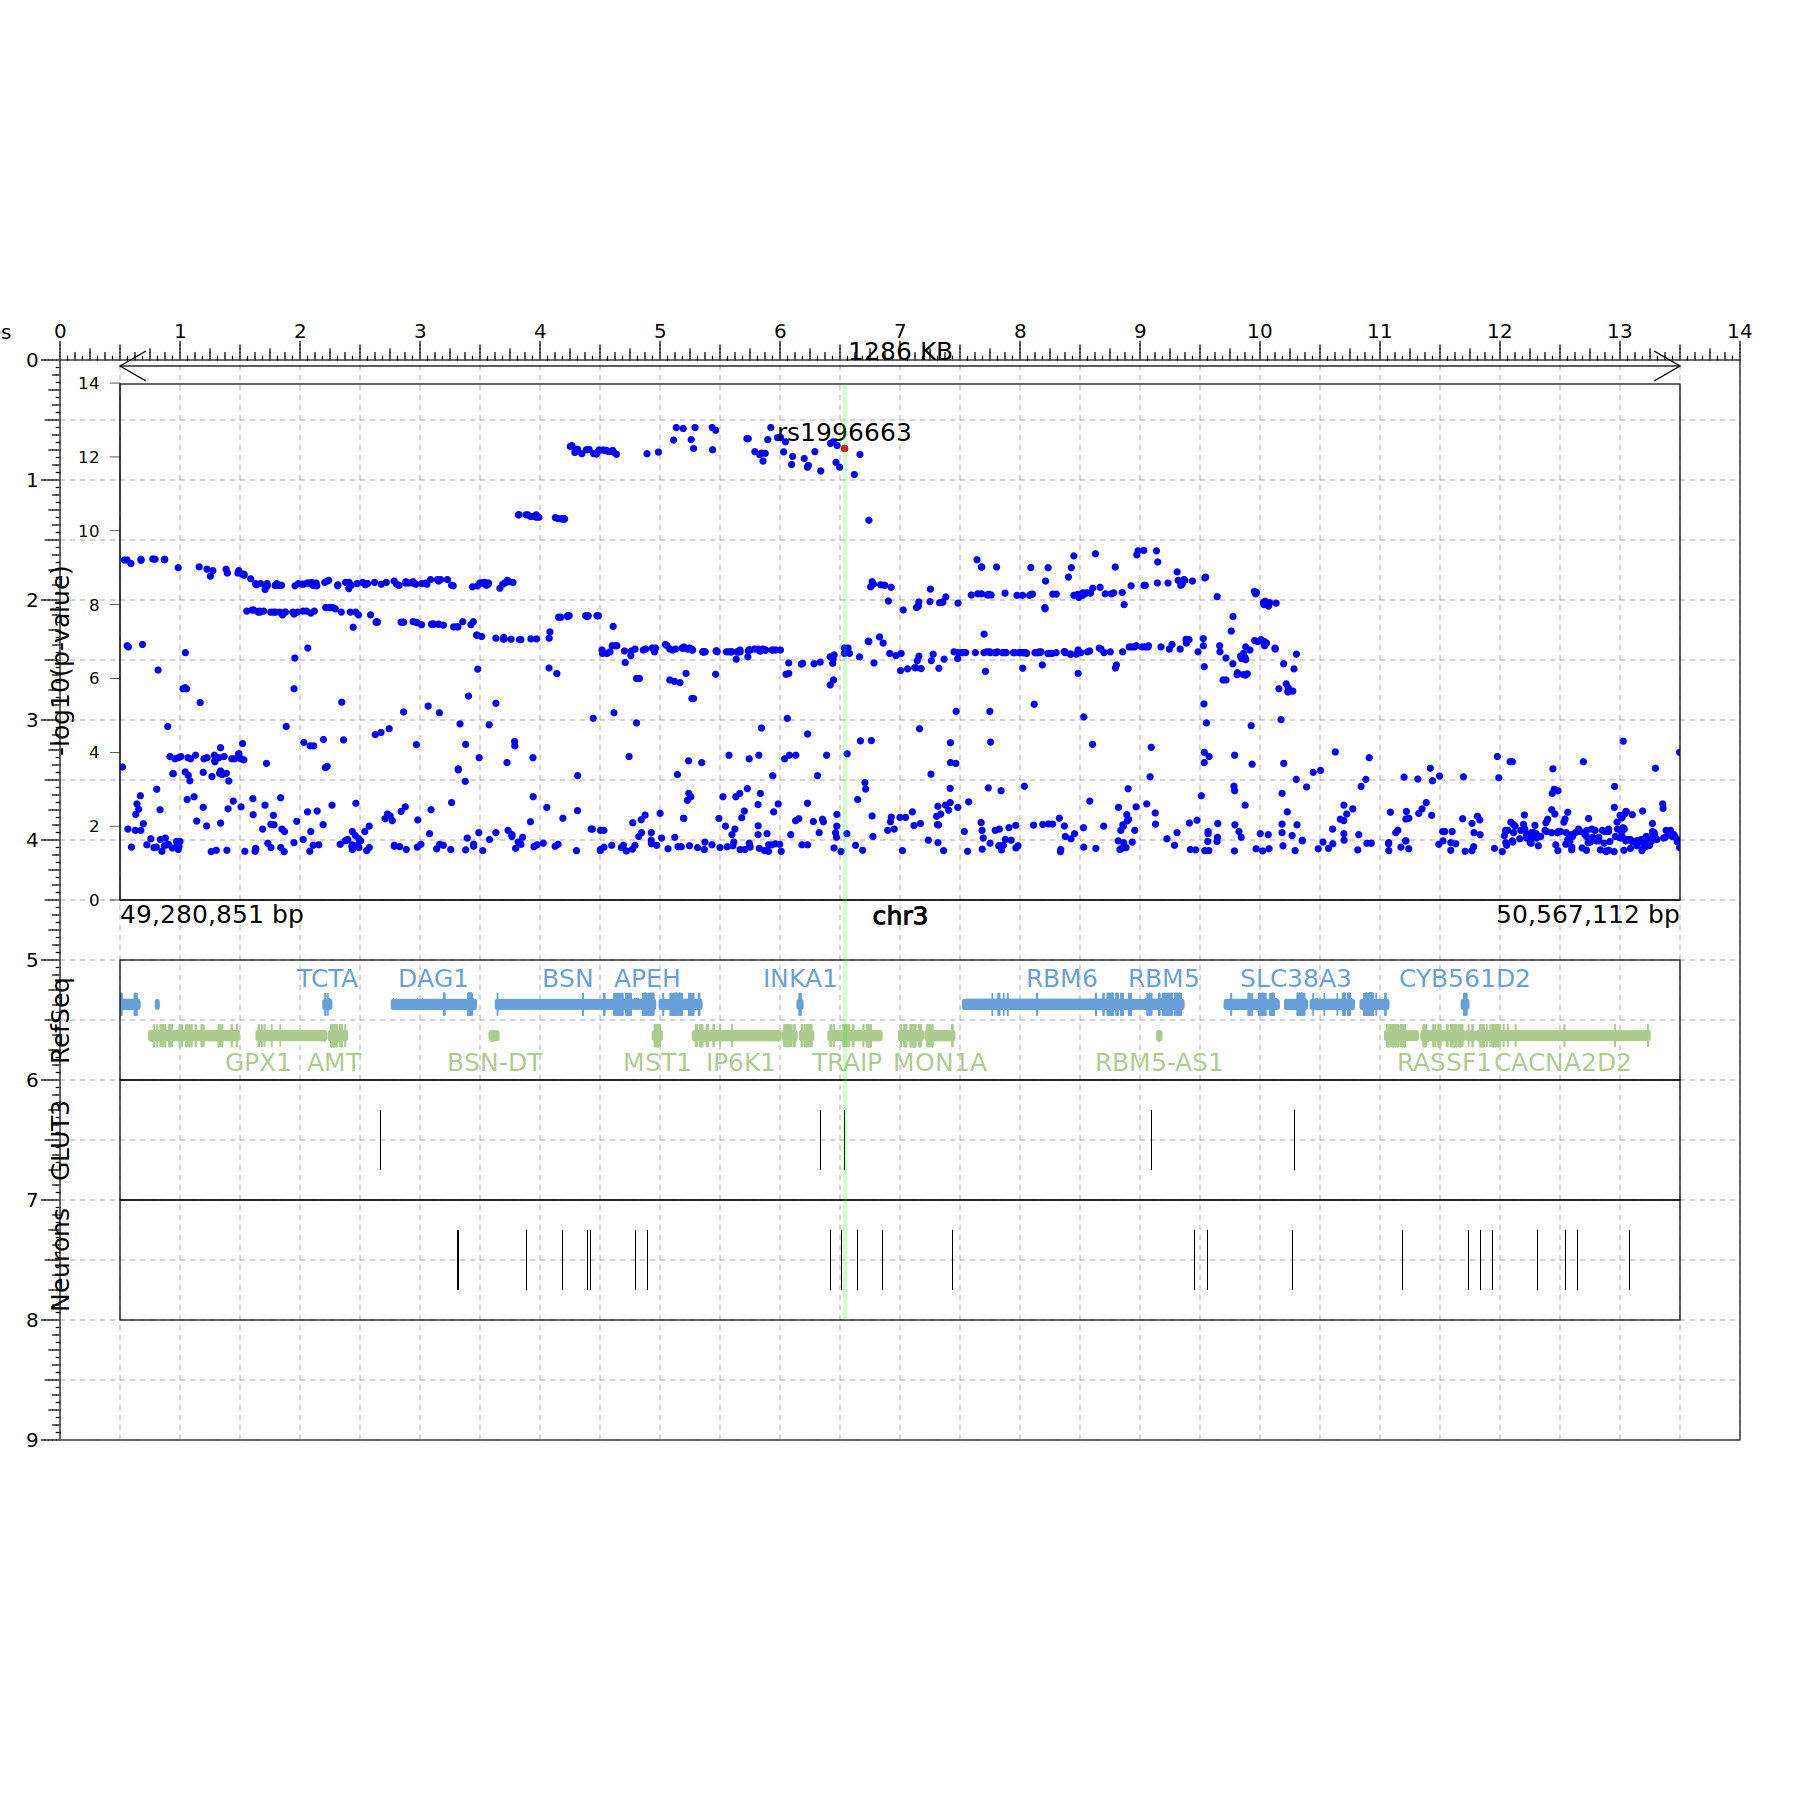

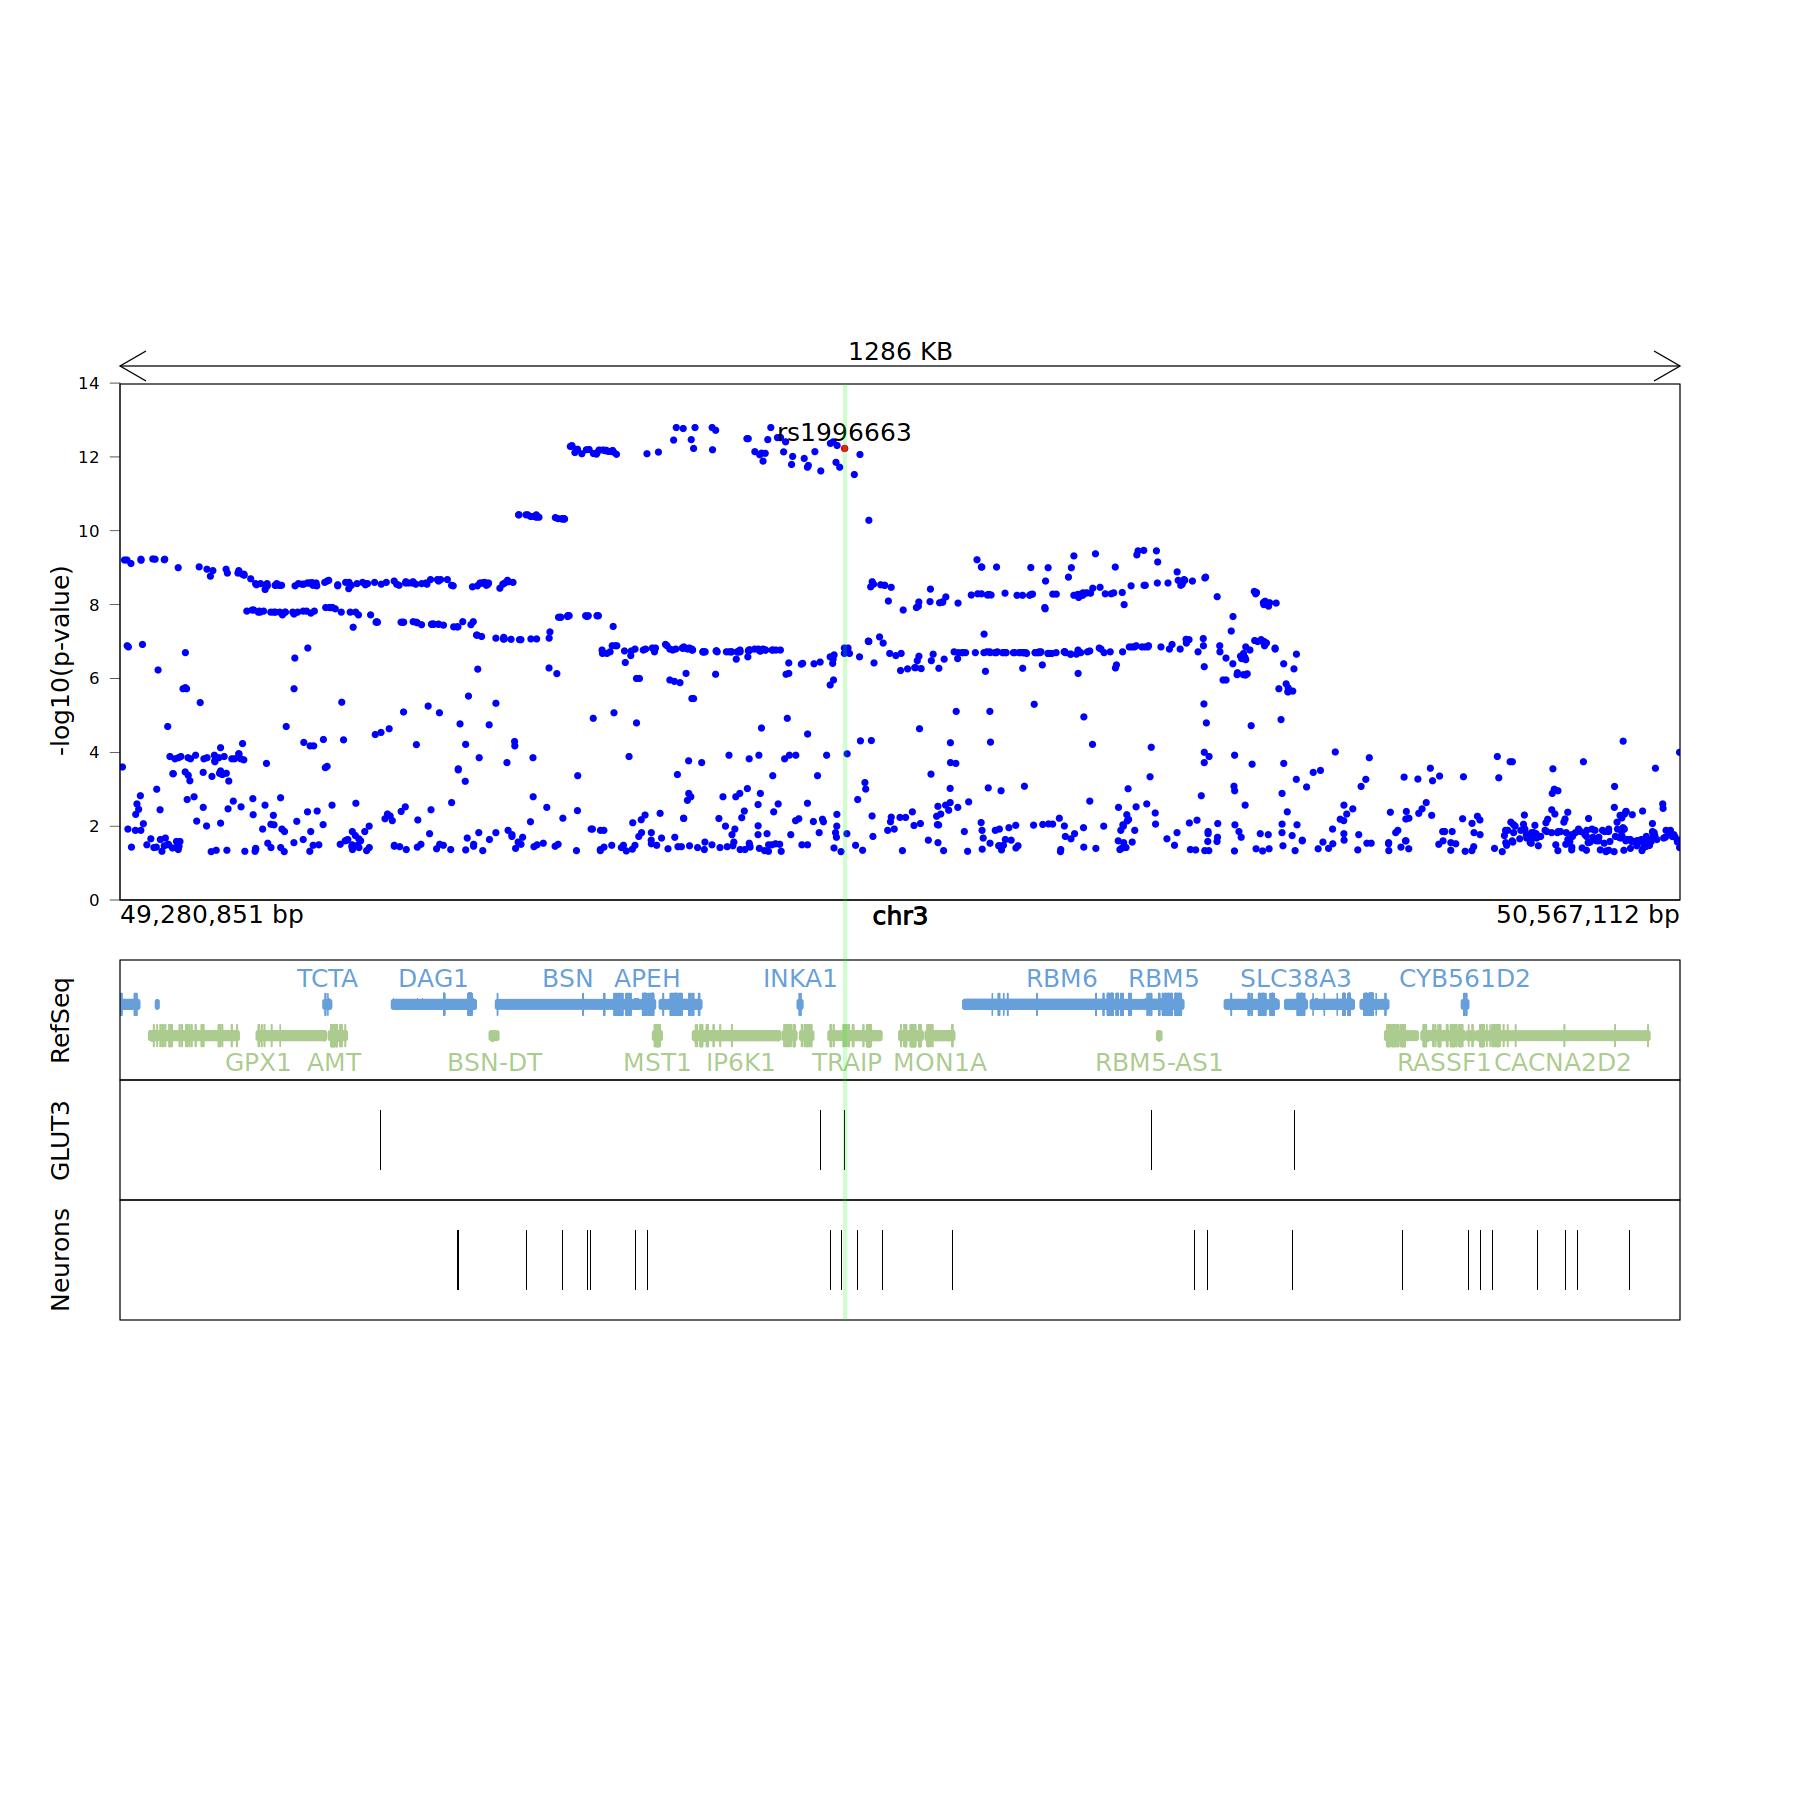

In [28]:
options(repr.plot.width=15, repr.plot.height=15)
## Create a plotgardener page
params <- pgParams(
    chrom = "chr3", chromstart = 49280851, chromend = 50567112,
    assembly = "hg19",
    x = 0.5, just = c("left", "top"),
    default.units = "inches", width = 13
)

pageCreate(
    width = 14, height = 9, default.units = "inches",
    
)
# #manhattan plot on page
# manPlot = plotManhattan(
#     data = SNP_Kupari_full,
#     chrom = "chr3",
#     x = 0.5, y = 0.5, height = 4, width = 13,
#     cex = 0.75#, leadSNP = list(snp = "rs4520683", fill = 'red')
# )

#manhattan plot on page
manPlot = plotManhattan(
    data = SNP_Kupari_full,
    params = params, y = 0.5, height = 4,
    cex = 0.4, fill = "blue", leadSNP = list(snp = "rs1996663", fill = 'red', fontsize = 15)
)

annoGenomeLabel(
    plot = manPlot, x = 0.5, y = 4.5, fontsize = 15,
    just = c("left", "top"), default.units = "inches"
)

## Annotate y-axis
annoYaxis(
    plot = manPlot, at = c(0,2,4,6,8,10,12,14),
    axisLine = TRUE, fontsize = 10, lex = .5
)

## Plot y-axis label
plotText(
    label = "-log10(p-value)", x = 0, y = 2.5, rot = 90,
    fontsize = 15, just = "center",
    default.units = "inches"
)
#plot  KB line
plotSegments(x0 = 0.5, x1 = 13.5, y0 = 0.05, y1 = 0.05, arrow = arrow(ends = "both"))

#add KB text
plotText(label = "1286 KB", x = 7, y = 0,
    fontsize = 15, just = c("center", "bottom"),
    default.units = "inches")


## Plot gene track
plotGenes(
    params = params,
    y = 5.5, height = 1, fontsize = 15,
    just = c("left"),
    strandLabels = FALSE,
    stroke = 4, geneOrder = c("TRAIP", "GPX1")
)


# ##Plot GLUT3 enhancer track
plotRanges(data = GLUT3, params = params,
           y = 6.5, height = .5,
          collapse = TRUE, just = c("left", "center"),
          fill = "black")

# ##Plot all other neurons enhancer track
plotRanges(data = neurons_gr[seqnames(neurons_gr) %in% "chr3"], params = params,
           y = 7.5, height = .5, collapse = TRUE, just = c("left", "center"), fill = "black")



#labels
plotText(
    label = "GLUT3", x = 0, y = 6.5, rot = 90,
    fontsize = 15, just = "center",
    default.units = "inches"
)
plotText(
    label = "Neurons", x = 0, y = 7.5, rot = 90,
    fontsize = 15, just = "center",
    default.units = "inches"
)
plotText(
    label = "RefSeq", x = 0, y = 5.5, rot = 90,
    fontsize = 15, just = "center",
    default.units = "inches"
)


# #add rectangles
# #rectangle around Manhattan plot
plotRect(x = 0.5, y = 0.2, width = 13, height = 4.3, just = c("left", "top"))

# #rectangle around RefSeq
plotRect(x=0.5, y=5.0, width = 13, height = 1, just = c("left", "top"))

# #rectangle around GLUT3
plotRect(x=0.5, y=6, width = 13, height = 1, just = c("left", "top"))

# #rectangle around neurons
plotRect(x=0.5, y=7, width = 13, height = 1, just = c("left", "top"))

#rectange at SNP
plotRect(x=6.54, y=0.2, width = .03, height = 7.8, just = c("center",'top'), fill = 'green', alpha = .2, lty = 0)

pageGuideHide()
# #fontface is a hidden parameter for plotText()